# e3_plot_interventions
Plot the interventions for all the COP

In [12]:
import import_ipynb
import c1_extract_paragraphe_issue as c1 
import c2_extract_sentence_issue as c2 
import e1_extract_occ_gen as e1
import csv
import numpy as np
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import matplotlib.patches as mpatches
import csv
from nltk import sent_tokenize
from nltk import word_tokenize
from nltk.tokenize import MWETokenizer

In [13]:
def open_list_meetings():
    """ Open the csv file that contain all the meetings. """
    f = open('Text/list_meetings.csv')
    return csv.reader(f)

In [14]:
def extract_cop():
    """ Extract all the occurences for all the issues that are for a COP """
    list_cop_issues = [int(i[4]) for i in open_list_meetings() if i[0] == 'COP'and int(i[4]) > 22]
    occurences_cops = []
    for c in list_cop_issues:
        p = c1.extract_paragraphes_from_issue(c)
        s = c2.extract_from_txt_sentences(p)
        occurences_cops += e1.extract_occurences_issue_ENB(s,c)
    return occurences_cops

In [15]:
def find_occ_between_typos(party_name, occ_party):
    """Return the right occurences from occ_party with no duplicates for party_name"""
    dict_ch = dict()
    occ_update = []
    list_cop_issues = [int(i[4]) for i in open_list_meetings() if i[0] == 'COP' and int(i[4]) > 22]
    for x in list_cop_issues:
        dict_ch[x] = []
        for s in occ_party:
            if(s[0] == x):
                dict_ch[x].append(s[2])
        dict_ch[x] = max(dict_ch[x])
        occ_update.append((x,party_name, dict_ch[x]))
    return occ_update

In [16]:
def extract_occ_countries(occurences_cops):
    """Extract occurence for Switzerland, US, China, G77/China, Saudi Arabia and Tuvalu."""
    occ_ch = []
    occ_us = []
    occ_china = []
    occ_g77 = []
    occ_tuvalu = []
    G77 = ['for the Group of 77 and China', 'G77','G77/CHINA','G77-CHINA','G77 & CHINA','G-77/CHINA','G-77/ CHINA']
    for line in occurences_cops:

        if(line[1] == 'SWITERLAND' or line[1] == 'SWITZER' or line[1] == 'SWITZERLAND'):
            occ_ch.append(line)           
        if(line[1] == 'US'):
            occ_us.append(line)
        if(line[1] == 'CHINA'):
            occ_china.append(line)
        if(line[1] in G77):
                occ_g77.append(line)
        if(line[1] == 'TUVALU'):
                occ_tuvalu.append(line)
    
    return find_occ_between_typos("CH", occ_ch), occ_china, occ_us, find_occ_between_typos("G77", occ_g77), occ_tuvalu

In [17]:
def combine_issues(occ_party, dict_cop):
    """Combine issues that are related to the same COP and count the number of occurences in total for each COP"""
    occ_party_m = []
    for k in dict_cop.keys():
        occ = 0
        for c in occ_party:
            if(c[0] in dict_cop[k]):
                occ += c[2]
        occ_party_m.append(occ)
    return occ_party_m

In [18]:
# Dictionary for each COP (key) with the issues related to it (values)
dict_cop = {1: np.arange(12,22),
            2: np.arange(29,38),
            3: np.arange(68,76),
             4: np.arange(88,97),
             5 : np.arange(113,123),
             6: np.arange(153,163),
             7: np.arange(179,189),
             8: np.arange(200,209),
             9: np.arange(222,230),
             10: np.arange(250,260),
             11: np.arange(281,291),
             12: np.arange(308,318),
             13: np.arange(344,354),
             14: np.arange(386,395),
             15: np.arange(449,459),
             16: np.arange(488,497),
             17: np.arange(524,534),
             18: np.arange(557,567),
             19: np.arange(584,593),
             20 : np.arange(609,619),
             21: np.arange(653,663),
             22: np.arange(679,689),
             23: np.arange(704,714),
             24: np.arange(736,747),
             25: np.arange(765,774)}

In [20]:
def plot_interventions_COP():
    """Plot for Switzerland, US, China, Saudi Arabia and Tuvalu thenumber of intervention for each COP"""
    # Find the occurences of each party for all COP beween 2-25
    occurences_cops = extract_cop()
    swiss, china, us, g77, tu  = extract_occ_countries(occurences_cops[1:])
    #Add COP 1 (collected manually because not written in capital)
    swiss.append((12,'CH',6))
    china.append((12,'China',4))
    us.append((12,'US',16))
    g77.append((12,'G77',9))
    tu.append((12,'TUVALU',0))

    #Combine all the intervention per issues for each COP
    switzerland = combine_issues(swiss, dict_cop)
    china = combine_issues(china, dict_cop)
    united_states = combine_issues(us, dict_cop)
    g77china = combine_issues(g77, dict_cop)
    tuvalu = combine_issues(tu,dict_cop)

    #Plot the interventions
    index = 1+np.arange(len(united_states))
    figsize = (24,9)

    fig, ax = plt.subplots(1, 1, figsize=figsize)

    csfont = {'fontname':'Helvetica','fontsize':'18' }
    hfont = {'fontname':'Helvetica','fontsize':'12'}

    plt.title('Number of intervention during COP between 1995-2020 for five parties',**csfont)
    plt.xlabel("COPs in chronological order", **hfont)
    plt.ylabel("Number of interventions", **hfont)

    x = index
    red_patch = mpatches.Patch(color='limegreen', label='United States')
    c_patch = mpatches.Patch(color='red', label='China')
    b_patch = mpatches.Patch(color='dodgerblue', label='Switzerland')
    a_patch = mpatches.Patch(color='darkorange', label='G77/China')
    t_patch = mpatches.Patch(color='yellow', label='Tuvalu')
    plt.legend(handles=[b_patch,c_patch,red_patch, a_patch, t_patch])
    ax.bar(x-0.3, switzerland, width=0.15, color='dodgerblue', align='center')
    ax.bar(x-0.15, china, width=0.15, color='red', align='center')
    ax.bar(x+0.0, united_states, width=0.15, color='limegreen', align='center')
    ax.bar(x+0.15, g77china, width=0.15, color='darkorange', align='center')
    ax.bar(x+0.3, tuvalu, width=0.15, color='yellow', align='center')
    plt.xticks(np.arange(min(x), max(x)+1, 1.0))

    plt.show()

Issue  28
Issue  29
Issue  30
Issue  31
Issue  32
Issue  33
Issue  34
Issue  35
Issue  36
Issue  37
Issue  38
https://enb.iisd.org/vol12/enb1267e.html
Issue  67
https://enb.iisd.org/vol12/enb1268e.html
Issue  68
https://enb.iisd.org/vol12/enb1269e.html
Issue  69
https://enb.iisd.org/vol12/enb1270e.html
Issue  70
https://enb.iisd.org/vol12/enb1271e.html
Issue  71
https://enb.iisd.org/vol12/enb1272e.html
Issue  72
https://enb.iisd.org/vol12/enb1273e.html
Issue  73
https://enb.iisd.org/vol12/enb1274e.html
Issue  74
https://enb.iisd.org/vol12/enb1275e.html
Issue  75
https://enb.iisd.org/vol12/enb1276e.html
Issue  76
https://enb.iisd.org/vol12/enb1287e.html
Issue  87
https://enb.iisd.org/vol12/enb1288e.html
Issue  88
https://enb.iisd.org/vol12/enb1289e.html
Issue  89
https://enb.iisd.org/vol12/enb1290e.html
Issue  90
https://enb.iisd.org/vol12/enb1291e.html
Issue  91
https://enb.iisd.org/vol12/enb1292e.html
Issue  92
https://enb.iisd.org/vol12/enb1293e.html
Issue  93
https://enb.iisd.org/vo

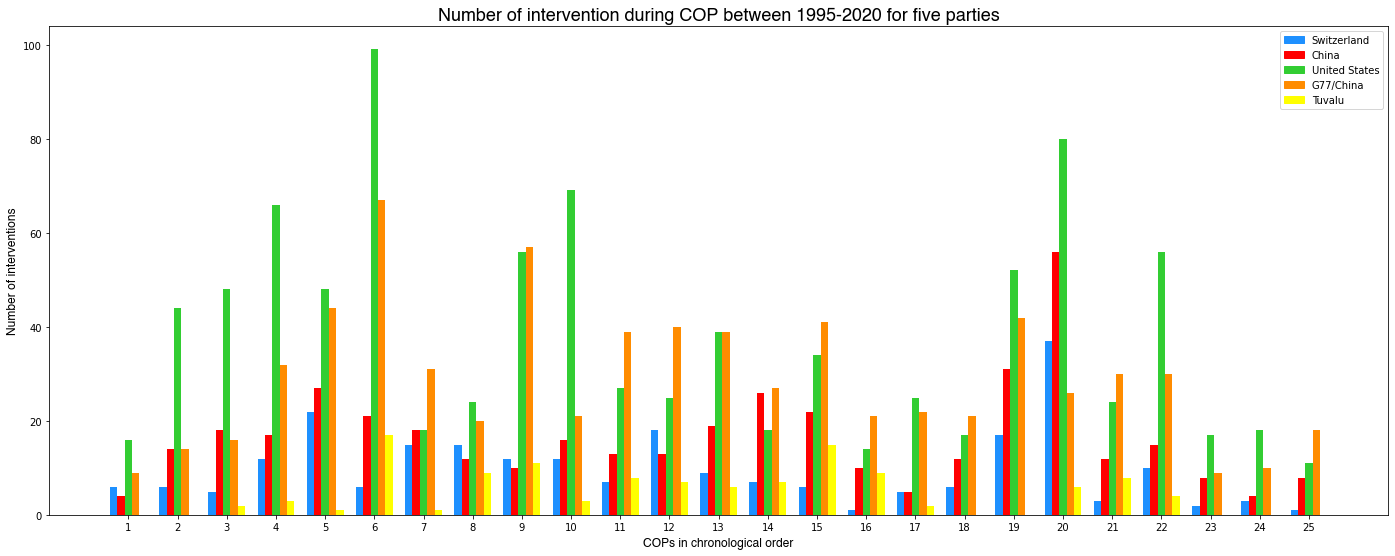

In [21]:
plot_interventions_COP()